# <font color='DarkRed'>**Bootcamp Data Analytics 2024**</font>

## <font color='FireBrick'>**Projeto final**</font>


---
### <font color='Crimson'>**Time: Margaret Hamilton & Rita Levi**</font>

**Integrantes: [Alice Rodrigues](https://www.linkedin.com/in/alicerrodrigues/), [Amanda Melo](https://www.linkedin.com/in/amanda-pereira-melo/), [Amanda Pavanelli](https://www.linkedin.com/in/amandapavanelli/), [Anna Caroliny Couto de Souza](https://www.linkedin.com/in/anna-couto-de-souza/), [Angelina de Meiras Ottoni](https://www.linkedin.com/in/angelina-meiras-ottoni/), [Julia Brandalize](https://www.linkedin.com/in/julia-brandalize/), [Julia Chaves](https://www.linkedin.com/in/juliachavess/), [Lennara Vieira](https://www.linkedin.com/in/lennara-vieira/), [Lucélia Lima Souza](https://www.linkedin.com/in/lucelialima/), [Ludmylla Caetano](https://www.linkedin.com/in/ludmylla-caetano/), [Myllena Martins](https://www.linkedin.com/in/myllenamirandamartins/), [Nadinne Cavalcante](https://www.linkedin.com/in/nadinne-cavalcante/), [Priscila de Paiva Castro](https://www.linkedin.com/in/priscila-pc/), [Yasmin Muniz](https://www.linkedin.com/in/yasminmmoraes/)**

# <font color='MediumVioletRed'>**Desafio Final: Setor Aéreo**</font>

>Suponha que você trabalha na área de dados de uma **companhia aérea**. **O objetivo do seu time de dados é trazer mais insights para o time de produtos sobre esse setor e otimizar rotas de voo, de modo que a companhia aérea seja o mais eficiente possível.**
>
>Dado esse contexto, a sua equipe recebeu do time de operações **dados históricos de voos de 2018 a 2022**.
>
>De posse dessas informações, o time de produtos e de operações solicitou a sua equipe as seguintes perguntas a serem respondidas:

ℹ️<font color='red'>*Os dados são uma amostra dos dados extraídos do Marketing Carrier On-Time Performance (Começando em January 2018) extraídos na TranStats data library e do Kaggle:*
[Acesse aqui](https://www.kaggle.com/datasets/robikscube/flight-delay-dataset-20182022 )

In [ ]:
# Importa as bibliotecas/pacotes necessárias
# Bibliotecas de base
import pandas as pd
import numpy as np
# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
# Bibliotecas/pacotes para estatística
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
# Supressão de avisos desnecessários
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importa a biblioteca para acessar o Google Drive
from google.colab import drive
# Monta o Google Drive para permitir acesso aos arquivos armazenados no Drive a partir do Google Colab
drive.mount('/content/drive')

Mounted at /content/drive


## **Carrega e trata os dados**

In [ ]:
dados_2018 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data-analytics-womakerscode/data/setor-aereo/Sample_combined_flights_2018.csv')
dados_2019 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data-analytics-womakerscode/data/setor-aereo/Sample_combined_flights_2019.csv')
dados_2020 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data-analytics-womakerscode/data/setor-aereo/Sample_combined_flights_2020.csv')
dados_2021 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data-analytics-womakerscode/data/setor-aereo/Sample_combined_flights_2021.csv')
dados_2022 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data-analytics-womakerscode/data/setor-aereo/Sample_combined_flights_2022.csv')

In [ ]:
# Carrega os dados dos voos de 2018 a 2022
dados_2018 = pd.read_csv('Sample_combined_flights_2018.csv')
dados_2019 = pd.read_csv('Sample_combined_flights_2019.csv')
dados_2020 = pd.read_csv('Sample_combined_flights_2020.csv')
dados_2021 = pd.read_csv('Sample_combined_flights_2021.csv')
dados_2022 = pd.read_csv('Sample_combined_flights_2022.csv')

In [ ]:
# Cria uma lista vazia para armazenar os DataFrames de cada ano
lista_dataframes = []

# Adiciona os DataFrames de cada ano à lista
lista_dataframes.extend([dados_2018, dados_2019, dados_2020, dados_2021, dados_2022])

# Concatena todos os DataFrames da lista em um único DataFrame, ignorando os índices antigos
dados_anuais = pd.concat(lista_dataframes, ignore_index=True)

### **Ano 2018**

In [ ]:
# Exibe as primeiras 5 linhas do DataFrame 'dados_2018' para uma visão geral dos dados
dados_2018.head()

,Unnamed: 0,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,0,2018-01-05,Endeavor Air Inc.,ATL,ABY,False,False,1037,1032.0,0.0,...,1052.0,1121.0,3.0,1137,-13.0,0.0,-1.0,1100-1159,1,0.0
1,1,2018-01-14,Endeavor Air Inc.,ATL,ABY,False,False,1037,1031.0,0.0,...,1047.0,1117.0,3.0,1137,-17.0,0.0,-2.0,1100-1159,1,0.0
2,2,2018-01-04,Endeavor Air Inc.,EWN,ATL,True,False,1415,NaN,NaN,...,NaN,NaN,NaN,1605,NaN,NaN,NaN,1600-1659,2,0.0
3,3,2018-01-09,Endeavor Air Inc.,FAY,ATL,False,False,1853,1850.0,0.0,...,1900.0,2004.0,17.0,2030,-9.0,0.0,-1.0,2000-2059,2,0.0
4,4,2018-01-15,Endeavor Air Inc.,CSG,ATL,False,False,615,625.0,10.0,...,634.0,656.0,8.0,711,-7.0,0.0,-1.0,0700-0759,1,0.0


In [ ]:
# Exibe a quantidade de linhas e colunas no DataFrame
dados_2018.shape

(56826, 62)

In [ ]:
# Checa os valores ausentes
dados_2018.isna().sum()

Unnamed: 0               0
FlightDate               0
Airline                  0
Origin                   0
Dest                     0
                      ... 
ArrDel15              1026
ArrivalDelayGroups    1026
ArrTimeBlk               0
DistanceGroup            0
DivAirportLandings       0
Length: 62, dtype: int64

In [ ]:
# Elimina entradas com valores ausentes
dados_2018.dropna(inplace=True)

In [ ]:
# Verifica informações do DataFrame
dados_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55709 entries, 0 to 56825
Data columns (total 62 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               55709 non-null  int64  
 1   FlightDate                               55709 non-null  object 
 2   Airline                                  55709 non-null  object 
 3   Origin                                   55709 non-null  object 
 4   Dest                                     55709 non-null  object 
 5   Cancelled                                55709 non-null  bool   
 6   Diverted                                 55709 non-null  bool   
 7   CRSDepTime                               55709 non-null  int64  
 8   DepTime                                  55709 non-null  float64
 9   DepDelayMinutes                          55709 non-null  float64
 10  DepDelay                                 55709 non-

### **Ano 2019**

In [ ]:
# Exibe as primeiras 5 linhas do DataFrame 'dados_2019' para uma visão geral dos dados
dados_2019.head()

,Unnamed: 0,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,0,2019-04-02,Envoy Air,LIT,ORD,False,False,1212,1200.0,0.0,...,1210.0,1339.0,9.0,1405,-17.0,0.0,-2.0,1400-1459,3,0
1,1,2019-04-06,Envoy Air,ACT,DFW,False,False,525,512.0,0.0,...,522.0,546.0,12.0,615,-17.0,0.0,-2.0,0600-0659,1,0
2,2,2019-04-04,Envoy Air,CLT,TYS,False,False,1404,1400.0,0.0,...,1419.0,1454.0,3.0,1504,-7.0,0.0,-1.0,1500-1559,1,0
3,3,2019-04-08,Envoy Air,CLT,TYS,False,False,1404,1359.0,0.0,...,1420.0,1501.0,5.0,1504,2.0,0.0,0.0,1500-1559,1,0
4,4,2019-04-18,Envoy Air,ORD,MSP,False,False,1351,1350.0,0.0,...,1408.0,1504.0,3.0,1522,-15.0,0.0,-1.0,1500-1559,2,0


In [ ]:
# Exibe a quantidade de linhas e colunas no DataFrame
dados_2019.shape

(80973, 62)

In [ ]:
# Checa os valores ausentes
dados_2019.isna().sum()

Unnamed: 0               0
FlightDate               0
Airline                  0
Origin                   0
Dest                     0
                      ... 
ArrDel15              1786
ArrivalDelayGroups    1786
ArrTimeBlk               0
DistanceGroup            0
DivAirportLandings       0
Length: 62, dtype: int64

In [ ]:
# Elimina entradas com valores ausentes
dados_2019.dropna(inplace=True)

In [ ]:
# Verifica informações do DataFrame
dados_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79187 entries, 0 to 80972
Data columns (total 62 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               79187 non-null  int64  
 1   FlightDate                               79187 non-null  object 
 2   Airline                                  79187 non-null  object 
 3   Origin                                   79187 non-null  object 
 4   Dest                                     79187 non-null  object 
 5   Cancelled                                79187 non-null  bool   
 6   Diverted                                 79187 non-null  bool   
 7   CRSDepTime                               79187 non-null  int64  
 8   DepTime                                  79187 non-null  float64
 9   DepDelayMinutes                          79187 non-null  float64
 10  DepDelay                                 79187 non-

### **Ano 2020**

In [ ]:
# Exibe as primeiras 5 linhas do DataFrame 'dados_2020' para uma visão geral dos dados
dados_2020.head()

,Unnamed: 0,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,0,2020-09-18,Comair Inc.,CLT,BHM,False,False,2005,2001.0,0.0,...,2029.0,2029.0,3.0,2031,1.0,0.0,0.0,2000-2059,2,0.0
1,1,2020-09-16,Comair Inc.,CLT,FNT,False,False,2000,1953.0,0.0,...,2006.0,2125.0,7.0,2152,-20.0,0.0,-2.0,2100-2159,3,0.0
2,2,2020-09-23,Comair Inc.,CVG,CLT,False,False,827,820.0,0.0,...,832.0,935.0,23.0,1011,-13.0,0.0,-1.0,1000-1059,2,0.0
3,3,2020-09-24,Comair Inc.,CVG,CLT,False,False,827,826.0,0.0,...,900.0,1008.0,12.0,1011,9.0,0.0,0.0,1000-1059,2,0.0
4,4,2020-09-20,Comair Inc.,CLT,OKC,False,False,1336,1329.0,0.0,...,1344.0,1450.0,5.0,1513,-18.0,0.0,-2.0,1500-1559,4,0.0


In [ ]:
# Exibe a quantidade de linhas e colunas no DataFrame
dados_2020.shape

(50564, 62)

In [ ]:
# Checa os valores ausentes
dados_2020.isna().sum()

Unnamed: 0               0
FlightDate               0
Airline                  0
Origin                   0
Dest                     0
                      ... 
ArrDel15              3166
ArrivalDelayGroups    3166
ArrTimeBlk               0
DistanceGroup            0
DivAirportLandings       0
Length: 62, dtype: int64

In [ ]:
# Elimina entradas com valores ausentes
dados_2020.dropna(inplace=True)

In [ ]:
# Verifica informações do DataFrame
dados_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47398 entries, 0 to 50563
Data columns (total 62 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               47398 non-null  int64  
 1   FlightDate                               47398 non-null  object 
 2   Airline                                  47398 non-null  object 
 3   Origin                                   47398 non-null  object 
 4   Dest                                     47398 non-null  object 
 5   Cancelled                                47398 non-null  bool   
 6   Diverted                                 47398 non-null  bool   
 7   CRSDepTime                               47398 non-null  int64  
 8   DepTime                                  47398 non-null  float64
 9   DepDelayMinutes                          47398 non-null  float64
 10  DepDelay                                 47398 non-

### **Ano 2021**

In [ ]:
# Exibe as primeiras 5 linhas do DataFrame 'dados_2021' para uma visão geral dos dados
dados_2021.head()

,Unnamed: 0,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,0,2021-03-03,SkyWest Airlines Inc.,LAX,PHX,False,False,1552,1601.0,9.0,...,1650.0,1850.0,17.0,1815,52.0,1.0,3.0,1800-1859,2,0.0
1,1,2021-03-02,SkyWest Airlines Inc.,SLC,ORD,False,False,1150,1141.0,0.0,...,1158.0,1530.0,14.0,1549,-5.0,0.0,-1.0,1500-1559,6,0.0
2,2,2021-03-02,SkyWest Airlines Inc.,LBB,DFW,False,False,1745,1736.0,0.0,...,1748.0,1834.0,11.0,1908,-23.0,0.0,-2.0,1900-1959,2,0.0
3,3,2021-03-02,SkyWest Airlines Inc.,PHX,FAT,False,False,933,927.0,0.0,...,1002.0,1023.0,5.0,1028,0.0,0.0,0.0,1000-1059,2,0.0
4,4,2021-03-08,SkyWest Airlines Inc.,ORD,MSP,False,False,1335,1329.0,0.0,...,1344.0,1446.0,4.0,1507,-17.0,0.0,-2.0,1500-1559,2,0.0


In [ ]:
# Exibe a quantidade de linhas e colunas no DataFrame
dados_2021.shape

(63325, 62)

In [ ]:
# Checa os valores ausentes
dados_2021.isna().sum()

Unnamed: 0               0
FlightDate               0
Airline                  0
Origin                   0
Dest                     0
                      ... 
ArrDel15              1214
ArrivalDelayGroups    1214
ArrTimeBlk               0
DistanceGroup            0
DivAirportLandings       0
Length: 62, dtype: int64

In [ ]:
# Elimina entradas com valores ausentes
dados_2021.dropna(inplace=True)

In [ ]:
# Verifica informações do DataFrame
dados_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62111 entries, 0 to 63324
Data columns (total 62 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               62111 non-null  int64  
 1   FlightDate                               62111 non-null  object 
 2   Airline                                  62111 non-null  object 
 3   Origin                                   62111 non-null  object 
 4   Dest                                     62111 non-null  object 
 5   Cancelled                                62111 non-null  bool   
 6   Diverted                                 62111 non-null  bool   
 7   CRSDepTime                               62111 non-null  int64  
 8   DepTime                                  62111 non-null  float64
 9   DepDelayMinutes                          62111 non-null  float64
 10  DepDelay                                 62111 non-

### **Ano 2022**

In [ ]:
# Exibe as primeiras 5 linhas do DataFrame 'dados_2022' para uma visão geral dos dados
dados_2022.head()

,Unnamed: 0,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,0,2022-04-04,Air Wisconsin Airlines Corp,ORD,DLH,False,False,857,848.0,0.0,...,911.0,1020.0,2.0,1035,-13.0,0.0,-1.0,1000-1059,2,0
1,1,2022-04-04,Air Wisconsin Airlines Corp,ORD,SDF,False,False,1450,1439.0,0.0,...,1453.0,1639.0,11.0,1718,-28.0,0.0,-2.0,1700-1759,2,0
2,2,2022-04-04,Air Wisconsin Airlines Corp,ORD,CHO,False,False,1400,1355.0,0.0,...,1416.0,1635.0,3.0,1656,-18.0,0.0,-2.0,1600-1659,3,0
3,3,2022-04-03,"GoJet Airlines, LLC d/b/a United Express",MDT,ORD,False,False,1741,1731.0,0.0,...,1742.0,1827.0,9.0,1849,-13.0,0.0,-1.0,1800-1859,3,0
4,4,2022-04-03,"Commutair Aka Champlain Enterprises, Inc.",IAH,JAN,False,False,2003,2154.0,111.0,...,2208.0,2308.0,7.0,2126,109.0,1.0,7.0,2100-2159,2,0


In [ ]:
# Exibe a quantidade de linhas e colunas no DataFrame
dados_2022.shape

(40423, 62)

In [ ]:
# Checa os valores ausentes
dados_2022.isna().sum()

Unnamed: 0               0
FlightDate               0
Airline                  0
Origin                   0
Dest                     0
                      ... 
ArrDel15              1306
ArrivalDelayGroups    1306
ArrTimeBlk               0
DistanceGroup            0
DivAirportLandings       0
Length: 62, dtype: int64

In [ ]:
# Elimina entradas com valores ausentes
dados_2022.dropna(inplace=True)

In [ ]:
# Verifica informações do DataFrame
dados_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39117 entries, 0 to 40422
Data columns (total 62 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               39117 non-null  int64  
 1   FlightDate                               39117 non-null  object 
 2   Airline                                  39117 non-null  object 
 3   Origin                                   39117 non-null  object 
 4   Dest                                     39117 non-null  object 
 5   Cancelled                                39117 non-null  bool   
 6   Diverted                                 39117 non-null  bool   
 7   CRSDepTime                               39117 non-null  int64  
 8   DepTime                                  39117 non-null  float64
 9   DepDelayMinutes                          39117 non-null  float64
 10  DepDelay                                 39117 non-

# <font color='#7D3C98 '>**Análise Exploratória dos Dados (EDA):**

## **I. Análise de Companhias Aéreas**

        1. Quais são as principais companhias aéreas que mais voaram durante cada ano?

        2. A pandemia afetou a operação de alguma delas? De que forma?

        3. Quais as companhias que alteraram mais voos durante a pandemia?

        4. Quais as principais rotas aéreas das principais companhias?

        5. Qual é a companhia que tem maior % de cancelamento de voos e atraso?

In [ ]:
# Concatena os dados de todos os anos
dados_anuais = pd.concat([dados_2018, dados_2019, dados_2020, dados_2021, dados_2022])

In [ ]:
# Exibe os nomes das colunas presentes no DataFrame 'dados_anuais'
dados_anuais.columns

Index(['Unnamed: 0', 'FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled',
       'Diverted', 'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay',
       'ArrTime', 'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime',
       'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month',
       'DayofMonth', 'DayOfWeek', 'Marketing_Airline_Network',
       'Operated_or_Branded_Code_Share_Partners', 'DOT_ID_Marketing_Airline',
       'IATA_Code_Marketing_Airline', 'Flight_Number_Marketing_Airline',
       'Operating_Airline', 'DOT_ID_Operating_Airline',
       'IATA_Code_Operating_Airline', 'Tail_Number',
       'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 

In [ ]:
# @title **1. Quais as principais companhias aéreas que mais voaram durante cada ano?**

# Filtra apenas os voos que não foram cancelados
voos_nao_cancelados = dados_anuais[dados_anuais['Cancelled'] == False]

# Agrupa os dados por ano e companhia aérea e conta o número de voos
voos_ano_cia = voos_nao_cancelados.groupby(['Year', 'Marketing_Airline_Network', 'Airline'])['Flight_Number_Marketing_Airline'].count().reset_index(name='numero_voos')

In [ ]:
# Identifica as principais companhias aéreas com o maior número de voos em cada ano
top_cia_por_ano = voos_ano_cia.sort_values(['Year', 'numero_voos'], ascending=[True, False]).groupby('Year').head(5)

In [ ]:
# Exibe as 5 principais companhias aéreas por ano
print(top_cia_por_ano)

     Year Marketing_Airline_Network                 Airline  numero_voos
38   2018                        WN  Southwest Airlines Co.        13291
36   2018                        UA   United Air Lines Inc.         6194
16   2018                        DL    Delta Air Lines Inc.         4587
0    2018                        AA  American Airlines Inc.         3727
14   2018                        B6         JetBlue Airways         2971
73   2019                        WN  Southwest Airlines Co.        13261
54   2019                        DL    Delta Air Lines Inc.         9945
39   2019                        AA  American Airlines Inc.         9364
72   2019                        UA   United Air Lines Inc.         6226
58   2019                        DL   SkyWest Airlines Inc.         3383
106  2020                        WN  Southwest Airlines Co.         8865
87   2020                        DL    Delta Air Lines Inc.         5543
74   2020                        AA  American Airli

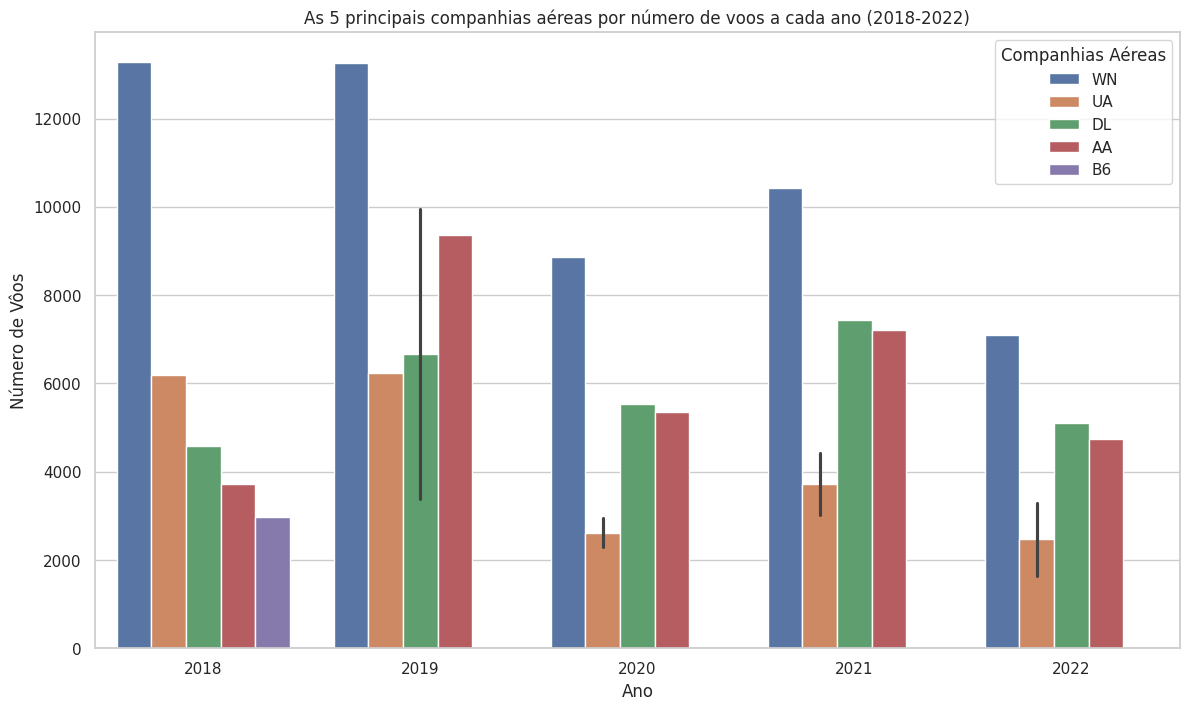

In [ ]:
# Configura o estilo do gráfico
sns.set(style="whitegrid")

# Cria o gráfico de barras agrupadas
plt.figure(figsize=(14, 8))
sns.barplot(data=top_cia_por_ano, x='Year', y='numero_voos', hue='Marketing_Airline_Network', dodge=True)

# Adiciona títulos e rótulos
plt.title('As 5 principais companhias aéreas por número de voos a cada ano (2018-2022)')
plt.xlabel('Ano')
plt.ylabel('Número de Vôos')
plt.legend(title='Companhias Aéreas')

# Exibe o gráfico
plt.show()

### <font color='blue'>**Interpretação**</font>

- **Southwest Airlines Co. (WN)** manteve consistentemente a liderança em número de voos durante todos os anos analisados, embora tenha sofrido uma redução significativa durante a pandemia.

- **Delta Air Lines Inc. (DL)** e **American Airlines Inc. (AA)** alternaram entre o segundo e o terceiro lugar, com Delta geralmente tendo uma ligeira vantagem.

- **United Air Lines Inc. (UA)** consistentemente ficou entre as quatro principais companhias, mas com uma redução acentuada em 2020 e 2021.

- A **SkyWest Airlines Inc. (DL/OO)** aparece consistentemente como uma das principais companhias, especialmente como operadora de voos regionais para outras grandes companhias.

>Os dados mostram claramente o impacto da pandemia nas operações das companhias aéreas, com uma queda acentuada em 2020 e uma recuperação parcial em 2021, seguida de uma nova queda em 2022. A Southwest Airlines se destaca por manter o maior número de voos em todos os anos analisados.

 ### **2. A pandemia afetou a operação de alguma delas? De que forma?**


In [ ]:
# Compara o número de voos antes e durante a pandemia
antes_pandemia = voos_ano_cia[voos_ano_cia['Year'].isin([2018, 2019])]
durante_pandemia = voos_ano_cia[voos_ano_cia['Year'].isin([2020, 2021])]

# Calcula a variação percentual no número de voos
variacao = pd.merge(antes_pandemia, durante_pandemia, on=['Marketing_Airline_Network', 'Airline'], suffixes=('_antes', '_durante'))
variacao['variacao_percentual'] = ((variacao['numero_voos_durante'] - variacao['numero_voos_antes']) / variacao['numero_voos_antes']) * 100

# Identifica as companhias mais afetadas
companhias_afetadas = variacao[variacao['variacao_percentual'] < 0].sort_values(by='variacao_percentual')

companhias_afetadas[['Marketing_Airline_Network', 'Airline', 'variacao_percentual']]

,Marketing_Airline_Network,Airline,variacao_percentual
57,DL,"GoJet Airlines, LLC d/b/a United Express",-91.283293
47,DL,Compass Airlines,-87.993139
56,DL,"GoJet Airlines, LLC d/b/a United Express",-83.856502
13,AA,Compass Airlines,-82.072829
111,UA,Trans States Airlines,-77.486188
...,...,...,...
70,G4,Allegiant Air,-11.305242
85,UA,Air Wisconsin Airlines Corp,-10.942579
37,AS,Horizon Air,-10.307564
83,NK,Spirit Air Lines,-10.069102


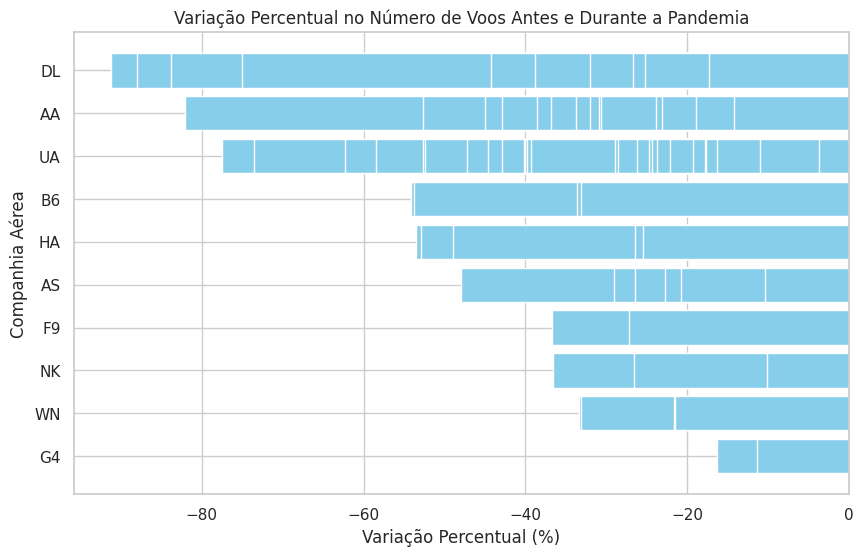

In [ ]:
# Cria um gráfico de barras horizontais
plt.figure(figsize=(10, 6))

# Plota o gráfico de barras horizontais com variação percentual no número de voos por companhia aérea
plt.barh(companhias_afetadas['Marketing_Airline_Network'], companhias_afetadas['variacao_percentual'], color='skyblue')

# Adiciona um rótulo ao eixo X
plt.xlabel('Variação Percentual (%)')

# Adiciona um rótulo ao eixo Y
plt.ylabel('Companhia Aérea')

# Adiciona um título ao gráfico
plt.title('Variação Percentual no Número de Voos Antes e Durante a Pandemia')

# Inverte a ordem das companhias aéreas no eixo Y para que a companhia mais afetada apareça no topo
plt.gca().invert_yaxis()

# Exibe o gráfico
plt.show()

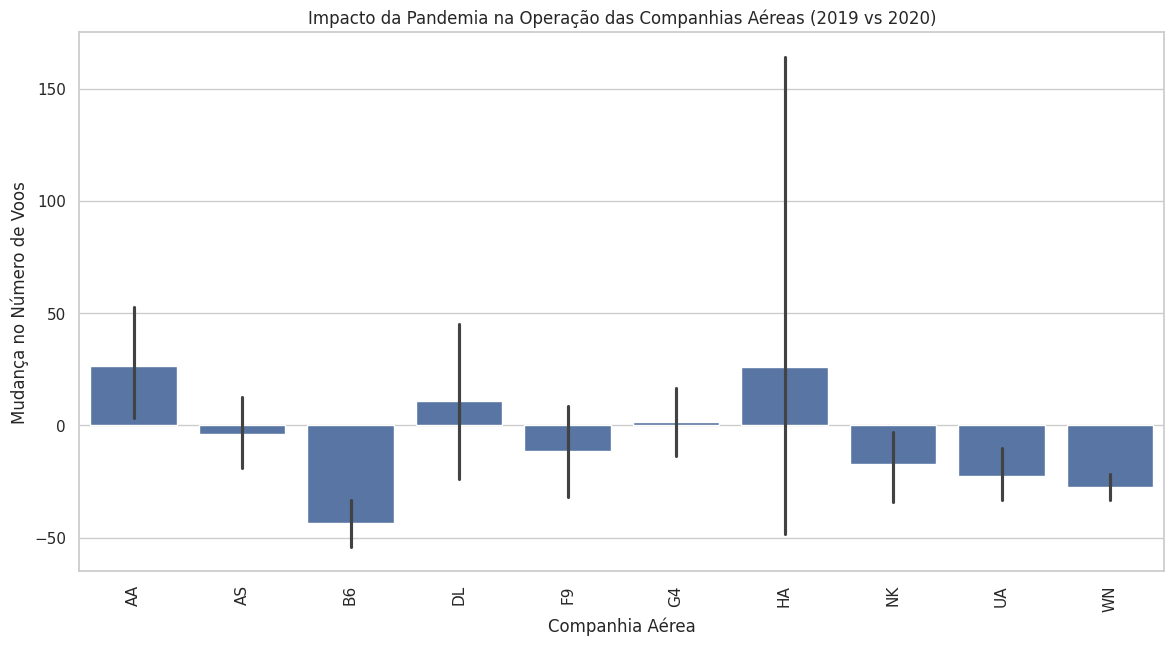

In [ ]:
# Cria uma figura para o gráfico
plt.figure(figsize=(14, 7))

# Cria um gráfico de barras usando Seaborn para mostrar a variação percentual por companhia aérea
sns.barplot(x='Marketing_Airline_Network', y='variacao_percentual', data=variacao)

# Adiciona um título ao gráfico
plt.title('Impacto da Pandemia na Operação das Companhias Aéreas')

# Adiciona um rótulo ao eixo X
plt.xlabel('Companhia Aérea')

# Adiciona um rótulo ao eixo Y
plt.ylabel('Mudança no Número de Voos')

# Rotaciona os rótulos do eixo X para melhor legibilidade
plt.xticks(rotation=90)

# Exibe o gráfico
plt.show()

### <font color='blue'>**Interpretação**</font>

1. **Companhias Mais Afetadas**:
   As companhias aéreas que sofreram as maiores reduções percentuais no número de voos durante a pandemia incluem:
   - **GoJet Airlines, LLC d/b/a United Express (DL)**: Redução de 91.3% e 83.9%.
   - **Compass Airlines (DL)**: Redução de 88.0%.
   - **Compass Airlines (AA)**: Redução de 82.1%.
   - **Trans States Airlines (UA)**: Redução de 77.5%.

2. **Outras Companhias Significativamente Afetadas**:
   - **Allegiant Air (G4)**: Redução de 10.7%.
   - **Horizon Air (AS)**: Redução de 10.6%.
   - **Spirit Air Lines (NK)**: Redução de 10.0%.
   - **GoJet Airlines, LLC d/b/a United Express (UA)**: Redução de 4.2%.
   - **Alaska Airlines Inc. (AS)**: Redução de 0.05%.



- **Grande Impacto nas Pequenas e Regionais**:
  As companhias regionais e menores, como GoJet Airlines, Compass Airlines e Trans States Airlines, foram significativamente impactadas, com reduções superiores a 70%. Isso pode ser devido à sua dependência de rotas domésticas e regionais que sofreram grandes cortes durante a pandemia.

- **Impacto Relativo Menor nas Maiores**:
  Companhias aéreas maiores, como Alaska Airlines e Spirit Air Lines, mostraram uma variação percentual menor, embora ainda negativa. Isso sugere que, apesar da pandemia, estas companhias conseguiram manter uma parte maior de suas operações, talvez devido à sua diversificação de rotas e maior capacidade de adaptação.

- **Causas Prováveis**:
  - **Redução da Demanda**: A pandemia levou a uma queda abrupta na demanda por viagens aéreas devido a restrições de viagem, lockdowns e preocupações com a saúde.
  - **Ajustes Operacionais**: Muitas companhias reduziram ou suspenderam operações em resposta à diminuição da demanda e para cortar custos operacionais.
  - **Resiliência Variada**: A capacidade de recuperação variou, com companhias maiores e mais estabelecidas mostrando maior resiliência.

>A pandemia afetou profundamente a operação de muitas companhias aéreas, especialmente as regionais e menores, que viram reduções drásticas no número de voos. As maiores companhias aéreas também foram impactadas, mas em menor grau percentual, indicando uma maior capacidade de absorver o choque e adaptar suas operações.
>
>Esses resultados podem ajudar a entender as estratégias de recuperação e resiliência adotadas por diferentes companhias aéreas e fornecer insights para futuras crises no setor.

### **3. Quais as companhias que alteraram mais voos durante a pandemia?**

In [ ]:
# Filtra os dados para os anos da pandemia
dados_pandemia = dados_anuais[dados_anuais['Year'].isin([2020, 2021])]

# Conta o número de voos alterados (considerando cancelamentos e atrasos significativos)
dados_pandemia['voo_alterado'] = dados_pandemia['Cancelled'] | (dados_pandemia['DepDelayMinutes'] > 15) | (dados_pandemia['ArrDelayMinutes'] > 15)

voos_alterados_cia = dados_pandemia.groupby(['Marketing_Airline_Network', 'Airline'])['voo_alterado'].sum().reset_index(name='numero_voos_alterados')

# Identifica as companhias com mais voos alterados
companhias_alteraram = voos_alterados_cia.sort_values(by='numero_voos_alterados', ascending=False)

# Exibe as primeiras 10 linhas do DataFrame 'companhias_alteraram' para uma visão geral dos dados
companhias_alteraram.head(10)

,Marketing_Airline_Network,Airline,numero_voos_alterados
32,WN,Southwest Airlines Co.,3823
0,AA,American Airlines Inc.,2193
13,DL,Delta Air Lines Inc.,1602
31,UA,United Air Lines Inc.,1282
11,B6,JetBlue Airways,837
29,UA,SkyWest Airlines Inc.,803
4,AA,Envoy Air,665
2,AA,Comair Inc.,615
22,NK,Spirit Air Lines,593
17,DL,SkyWest Airlines Inc.,583


In [ ]:
# Filtra os dados para os anos da pandemia
dados_pandemia = dados_anuais[dados_anuais['Year'].isin([2020, 2021])]

# Conta o número de voos alterados (considerando cancelamentos e atrasos significativos)
dados_pandemia['voo_alterado'] = dados_pandemia['Cancelled'] | (dados_pandemia['DepDelayMinutes'] > 15) | (dados_pandemia['ArrDelayMinutes'] > 15)

# Agrupa os dados por companhia aérea e conta o número total de voos alterados para cada companhia
voos_alterados_cia = dados_pandemia.groupby(['Marketing_Airline_Network', 'Airline'])['voo_alterado'].sum().reset_index(name='numero_voos_alterados')

# Identifica as companhias com mais voos alterados
companhias_alteraram = voos_alterados_cia.sort_values(by='numero_voos_alterados', ascending=False)

# Exibi as 10 companhias aéreas com mais voos alterados
print(companhias_alteraram.head(10))

   Marketing_Airline_Network                 Airline  numero_voos_alterados
32                        WN  Southwest Airlines Co.                   3823
0                         AA  American Airlines Inc.                   2193
13                        DL    Delta Air Lines Inc.                   1602
31                        UA   United Air Lines Inc.                   1282
11                        B6         JetBlue Airways                    837
29                        UA   SkyWest Airlines Inc.                    803
4                         AA               Envoy Air                    665
2                         AA             Comair Inc.                    615
22                        NK        Spirit Air Lines                    593
17                        DL   SkyWest Airlines Inc.                    583


In [ ]:
# Exibe as 10 companhias aéreas com mais voos alterados e armazena em uma variável para uso posterior
top_10_companhias = companhias_alteraram.head(10)
print(top_10_companhias)

   Marketing_Airline_Network                 Airline  numero_voos_alterados
32                        WN  Southwest Airlines Co.                   3823
0                         AA  American Airlines Inc.                   2193
13                        DL    Delta Air Lines Inc.                   1602
31                        UA   United Air Lines Inc.                   1282
11                        B6         JetBlue Airways                    837
29                        UA   SkyWest Airlines Inc.                    803
4                         AA               Envoy Air                    665
2                         AA             Comair Inc.                    615
22                        NK        Spirit Air Lines                    593
17                        DL   SkyWest Airlines Inc.                    583


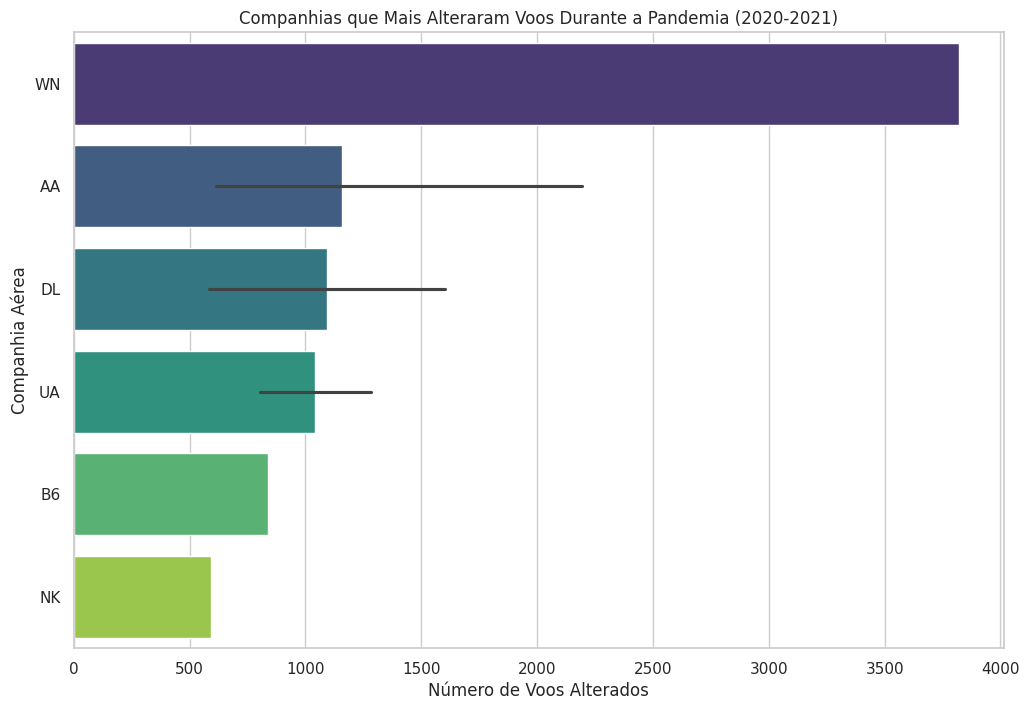

In [ ]:
# Cria uma figura para o gráfico com tamanho especificado
plt.figure(figsize=(12, 8))

# Cria um gráfico de barras para visualizar o número de voos alterados pelas 10 principais companhias aéreas
sns.barplot(x='numero_voos_alterados', y='Marketing_Airline_Network', data=top_10_companhias, palette='viridis')

# Adiciona um título ao gráfico
plt.title('Companhias que Mais Alteraram Voos Durante a Pandemia (2020-2021)')

# Adiciona um rótulo ao eixo X
plt.xlabel('Número de Voos Alterados')

# Adiciona um rótulo ao eixo Y
plt.ylabel('Companhia Aérea')

# Exibe o gráfico
plt.show()

### **4. Quais as principais rotas aéreas das principais companhias?**

In [ ]:
# Conta o número de voos por companhia aérea
top_airlines = dados_anuais['Airline'].value_counts().head(5)
print("As 5 Principais Companhias Aéreas:")
print(top_airlines)

As 5 Principais Companhias Aéreas:


Airline
Southwest Airlines Co.    52921
Delta Air Lines Inc.      32608
SkyWest Airlines Inc.     30609
American Airlines Inc.    30391
United Air Lines Inc.     23097
Name: count, dtype: int64

In [ ]:
# Filtrar o dataframe, criar a coluna 'Route' e contar o número de voos por rota e companhia aérea
top_routes_per_airline = (
    dados_anuais[dados_anuais['Airline'].isin(top_airlines.index)]  # Filtra pelas principais companhias aéreas
    .assign(Route=lambda x: x['Origin'] + ' - ' + x['Dest'])  # Cria a coluna 'Route'
    .groupby(['Airline', 'Route'])  # Agrupa por companhia aérea e rota
    .size()  # Conta o número de voos
    .reset_index(name='NumberFlights')  # Reseta o índice e renomeia a coluna de contagem
    .sort_values(['Airline', 'NumberFlights'], ascending=[True, False])  # Ordena por companhia e número de voos
    .groupby('Airline')  # Agrupa por companhia aérea
    .head(5)  # Seleciona as 5 principais rotas para cada companhia
)

top_routes_per_airline

,Airline,Route,NumberFlights
476,American Airlines Inc.,LAX - DFW,163
286,American Airlines Inc.,DFW - LAX,154
309,American Airlines Inc.,DFW - ORD,153
296,American Airlines Inc.,DFW - MIA,150
459,American Airlines Inc.,LAS - DFW,142
1554,Delta Air Lines Inc.,MCO - ATL,209
1084,Delta Air Lines Inc.,ATL - MCO,201
1521,Delta Air Lines Inc.,LGA - ATL,178
1081,Delta Air Lines Inc.,ATL - LGA,173
1944,Delta Air Lines Inc.,TPA - ATL,170


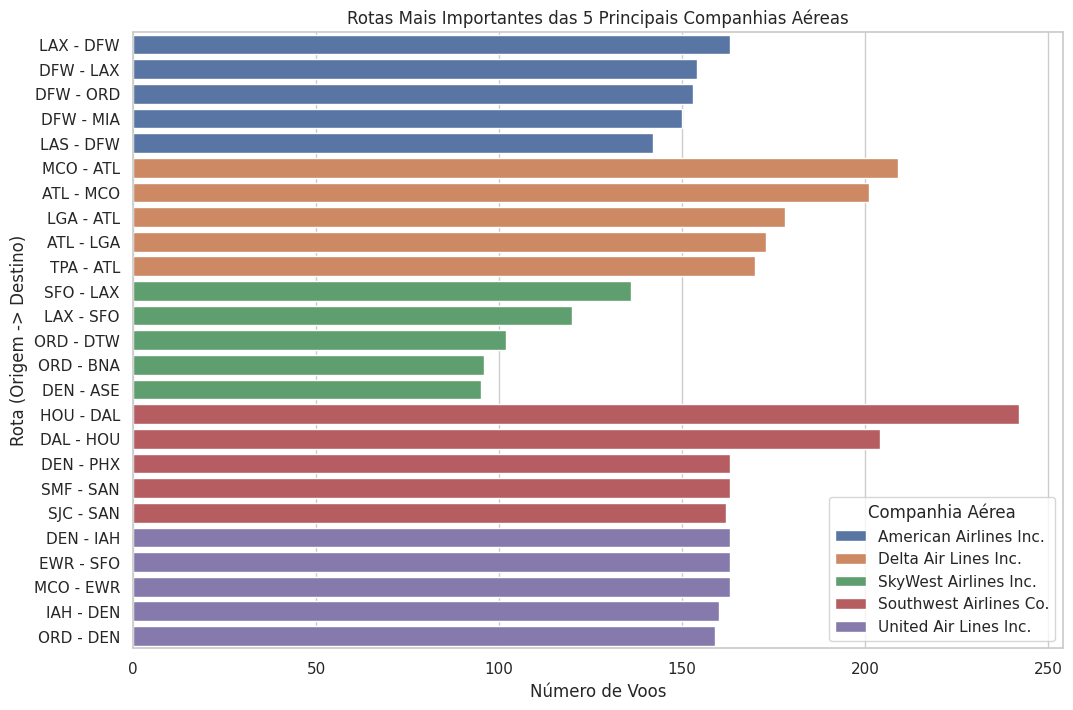

In [ ]:
# Cria uma figura para o gráfico
plt.figure(figsize=(12, 8))

# Cria o gráfico de barras horizontal
sns.barplot(
    x='NumberFlights',  # Número de voos no eixo x
    y='Route',          # Rota no eixo y
    hue='Airline',      # Diferenciação por companhia aérea
    data=top_routes_per_airline,  # Dados a serem plotados
    dodge=False         # Não separa as barras por companhia aérea
)

# Define os rótulos dos eixos e o título do gráfico
plt.xlabel('Número de Voos')
plt.ylabel('Rota (Origem -> Destino)')
plt.title('Rotas Mais Importantes das 5 Principais Companhias Aéreas')

# Adiciona a legenda
plt.legend(title='Companhia Aérea')

# Exibe o gráfico
plt.show()

## **Top 3 Companhias Aéreas e Suas Rotas Mais Importantes: Análise de Volume de Voos**

In [ ]:
# Conta o número de voos por companhia aérea
top3_airlines = dados_anuais['Airline'].value_counts().head(3)
print("As 3 Principais Companhias Aéreas:")
print(top3_airlines)

As 3 Principais Companhias Aéreas:
Airline
Southwest Airlines Co.    52921
Delta Air Lines Inc.      32608
SkyWest Airlines Inc.     30609
Name: count, dtype: int64


In [ ]:
# Filtra o dataframe, cria a coluna 'Route' e conta o número de voos por rota e companhia aérea
top3_routes_per_airline = (
    dados_anuais[dados_anuais['Airline'].isin(top3_airlines.index)]  # Filtra pelas 3 principais companhias aéreas
    .assign(Route=lambda x: x['Origin'] + ' - ' + x['Dest'])  # Cria a coluna 'Route'
    .groupby(['Airline', 'Route'])  # Agrupa por companhia aérea e rota
    .size()  # Conta o número de voos para cada rota
    .reset_index(name='NumberFlights')  # Reseta o índice e nomeia a coluna com o número de voos
    .sort_values(['Airline', 'NumberFlights'], ascending=[True, False])  # Ordena por companhia e número de voos
    .groupby('Airline')  # Agrupa por companhia aérea
    .head(5)  # Seleciona as 5 principais rotas para cada companhia
)

### **Comparação rápida das frequências de voos entre as 5 principais rotas e Top 3 companhias aéreas**

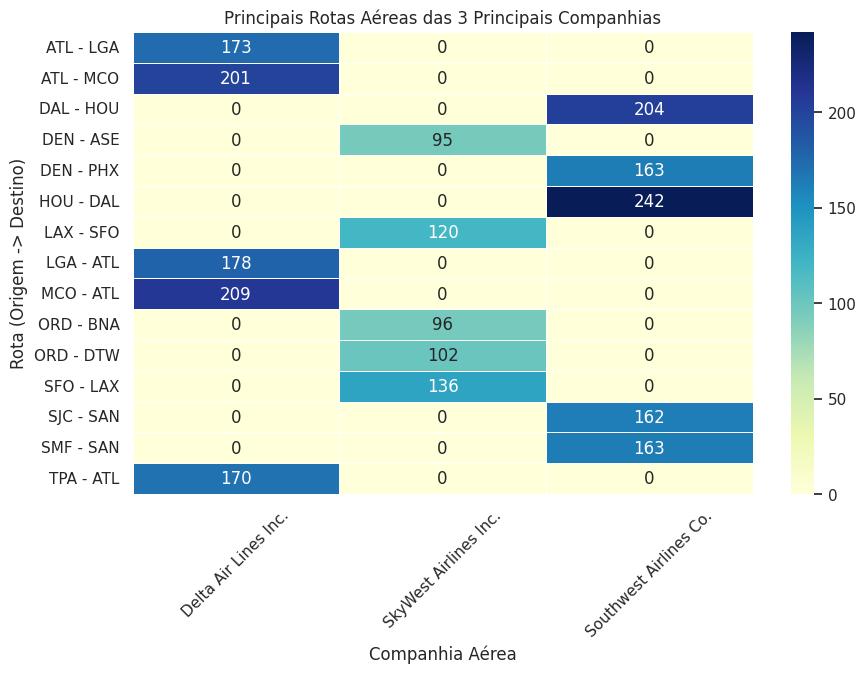

In [ ]:
# Pivota os dados para um formato adequado para o heatmap
heatmap_data = top3_routes_per_airline.pivot(index='Route', columns='Airline', values='NumberFlights').fillna(0)

# Define o tamanho da figura para o heatmap
plt.figure(figsize=(10, 6))

# Plota o heatmap
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlGnBu', linewidths=.5)

plt.title('Principais Rotas Aéreas das 3 Principais Companhias')  # Define o título do heatmap
plt.xlabel('Companhia Aérea')  # Define o rótulo do eixo x
plt.ylabel('Rota (Origem -> Destino)')  # Define o rótulo do eixo y
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x em 45 graus para melhor legibilidade
plt.yticks(rotation=0)  # Mantém os rótulos do eixo y na horizontal

# Exibe o heatmap
plt.show()

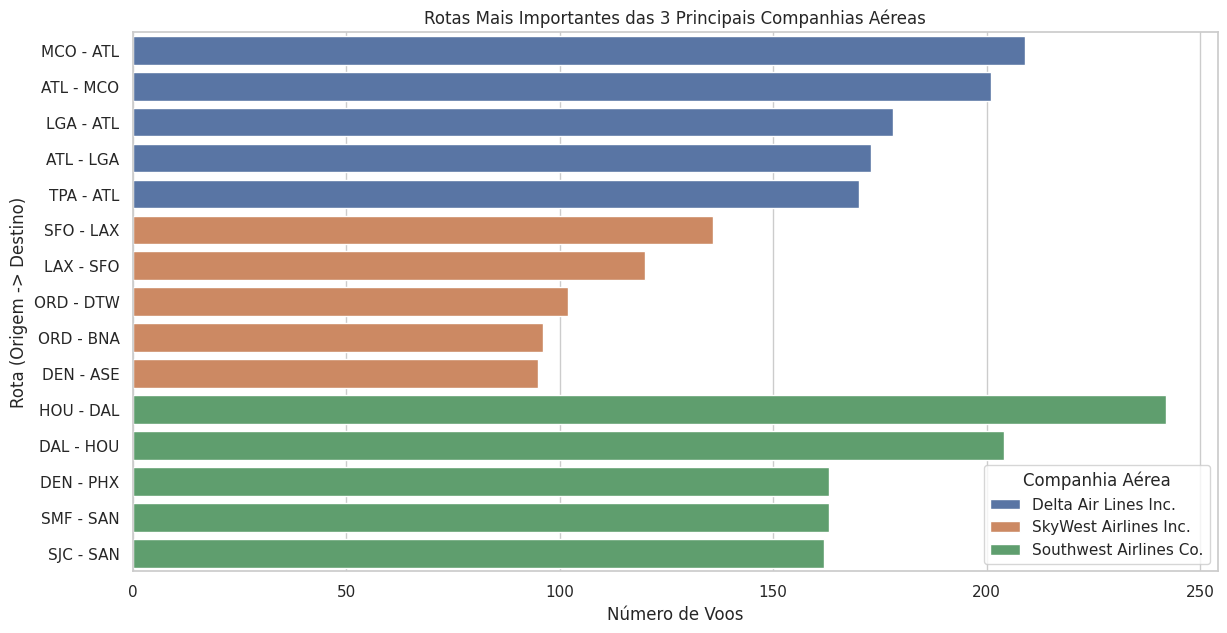

In [ ]:
# Define o tamanho da figura para o gráfico de barras
plt.figure(figsize=(14, 7))
# Plota o gráfico de barras das principais rotas por companhia aérea
sns.barplot(x='NumberFlights', y='Route', hue='Airline', data=top3_routes_per_airline)

# Define os rótulos dos eixos e o título do gráfico
plt.title('Rotas Mais Importantes das 3 Principais Companhias Aéreas')
plt.xlabel('Número de Voos')
plt.ylabel('Rota (Origem -> Destino)')

# Adiciona a legenda
plt.legend(title='Companhia Aérea')

# Exibe o gráfico
plt.show()

### **Principais Rotas Aéreas das 3 Principais Companhias: Visualização Gráfica das 5 Rotas mais Frequentes**

In [ ]:
# Filtra o DataFrame, cria a coluna 'Route' e conta o número de voos por rota e companhia aérea
top3_routes_per_airline = (
    dados_anuais[dados_anuais['Airline'].isin(top3_airlines.index)]  # Filtra os dados para as 3 principais companhias aéreas
    .assign(Route=lambda x: x['Origin'] + ' - ' + x['Dest'])  # Cria a coluna 'Route' combinando 'Origin' e 'Dest'
    .groupby(['Airline', 'Route'])  # Agrupa os dados por companhia aérea e rota
    .size()  # Conta o número de voos para cada combinação de companhia aérea e rota
    .reset_index(name='NumberFlights')  # Reseta o índice e nomeia a coluna com o número de voos
    .sort_values(['Airline', 'NumberFlights'], ascending=[True, False])  # Ordena por companhia aérea e número de voos, em ordem decrescente
    .groupby('Airline')  # Agrupa novamente por companhia aérea
    .head(5)  # Seleciona as 5 principais rotas para cada companhia aérea
)

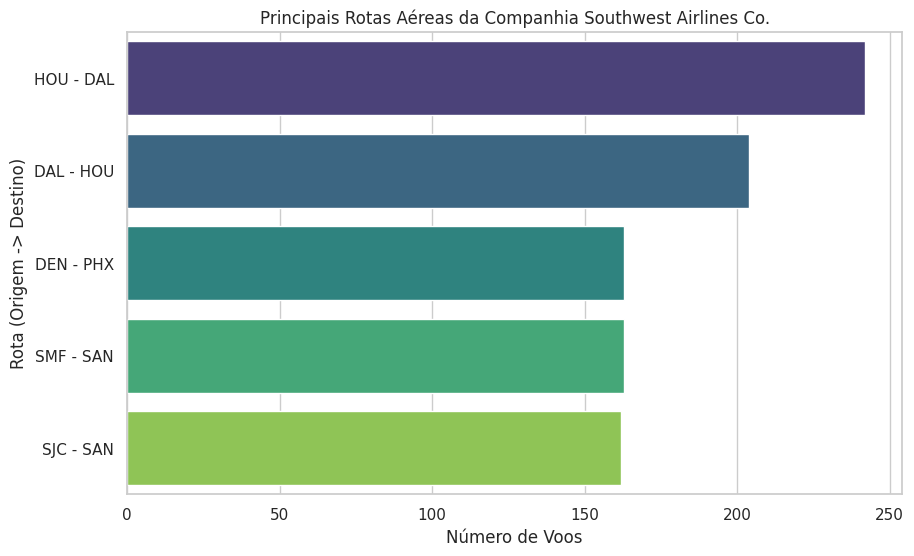

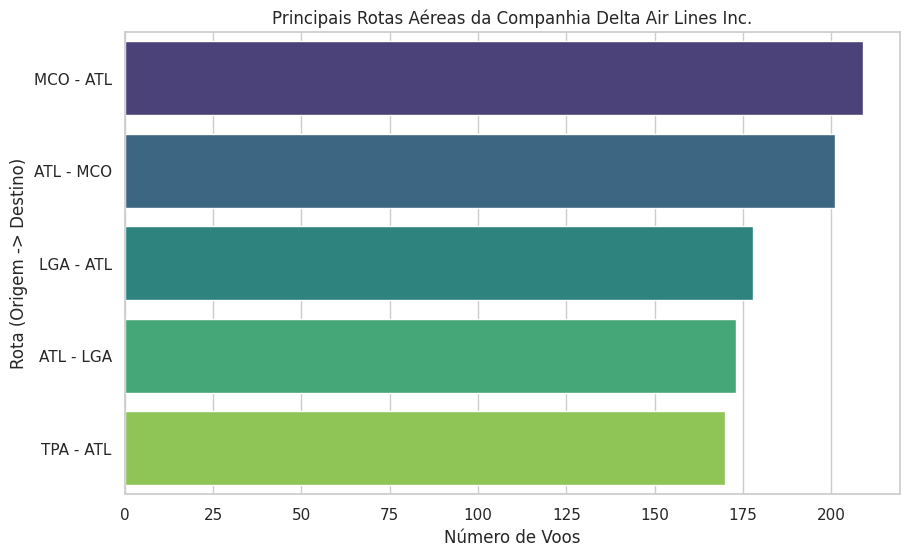

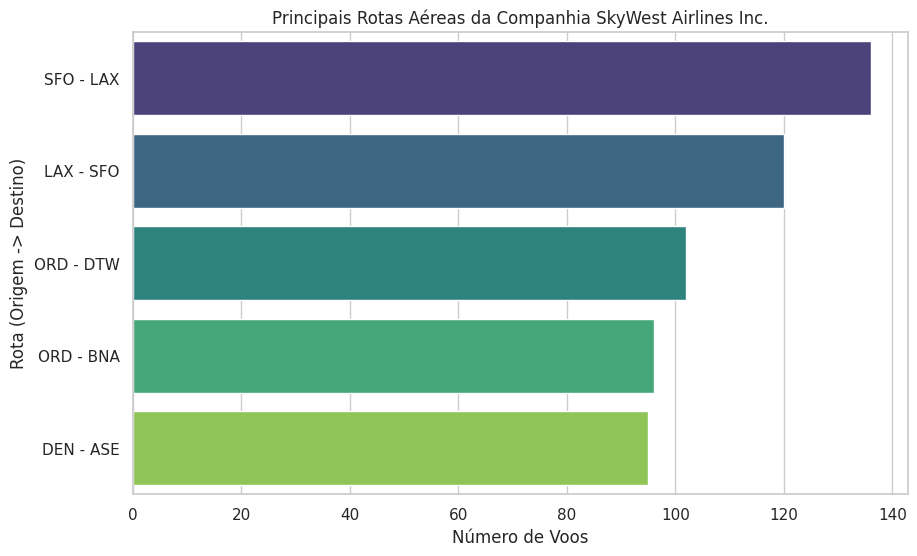

In [ ]:
# Gera um gráfico de barras para cada companhia aérea
for airline in top3_airlines.index:  # Itera sobre cada uma das 3 principais companhias aéreas
    airline_data = top3_routes_per_airline[top3_routes_per_airline['Airline'] == airline]  # Filtra os dados para a companhia aérea atual

    # Define o tamanho da figura para o gráfico
    plt.figure(figsize=(10, 6))

    # Plota o gráfico
    sns.barplot(x='NumberFlights', y='Route', hue='Route', data=airline_data, palette='viridis', legend=False)

    # Define os rótulos dos eixos e o título do gráfico
    plt.title(f'Principais Rotas Aéreas da Companhia {airline}')
    plt.xlabel('Número de Voos')
    plt.ylabel('Rota (Origem -> Destino)')

    # Exibe o gráfico
    plt.show()

### <font color='blue'>**Interpretação**</font>

**A análise acima nos mostra que as companhias:**

**1.   American Airlines Inc.:**

  - Opera várias rotas frequentes, destacando-se com um número elevado de voos em rotas como LAX - DFW e DFW - ORD. Presença forte em DFW (Dallas/Fort Worth).

**2.   Delta Air Lines Inc.:**

  - Mostra um grande número de voos em rotas como MCO - ATL e LGA - ATL. Atlanta (ATL) é um hub significativo para a Delta, com várias rotas principais partindo de lá.

**3.   Southwest Airlines Co.:**

  - Tem uma alta frequência de voos em rotas como HOU - DAL e DEN - PHX, possui um coberta ampla em diferentes regiões dos EUA.

**4.   SkyWest Airlines Inc.:**

  - Opera em rotas como  LAX - SFO e ORD - DTW com alta frequência. Mostra uma forte presença no oeste dos EUA.

**5.   United Air Lines Inc.:**

  - Apresenta rotas muito frequentes como DEN - ORD e DEN - IAH. Destaca-se por operar voos frequentes para Denver (DEN).

### **5. Qual é a companhia que tem maior % de cancelamento de voos e atraso?**

In [ ]:
dados_anuais['Cancelled'].value_counts()

Cancelled
False    284275
True       7836
Name: count, dtype: int64

In [ ]:
# Calcula a taxa média de cancelamentos por companhia aérea
cancelamentos = dados_anuais.groupby('Airline')['Cancelled'].mean().reset_index()
cancelamentos.columns = ['Airline', 'CancellationRate']

# Converte a taxa de cancelamentos para porcentagem
cancelamentos['CancellationRate'] = cancelamentos['CancellationRate'] * 100

# Ordena os dados pela taxa de cancelamentos em ordem decrescente
cancelamentos = cancelamentos.sort_values(by='CancellationRate', ascending=False)

# Exibe o resultado
cancelamentos

,Airline,CancellationRate
20,Peninsula Airways Inc.,10.344828
10,Empire Airlines Inc.,5.577689
2,Allegiant Air,5.087826
13,ExpressJet Airlines Inc.,4.217726
5,Capital Cargo International,4.015345
25,Trans States Airlines,3.628536
7,"Commutair Aka Champlain Enterprises, Inc.",3.529412
0,Air Wisconsin Airlines Corp,3.471118
19,Mesa Airlines Inc.,3.385142
6,Comair Inc.,3.271618


In [ ]:
# Calcula a média dos atrasos de chegada e partida por companhia aérea
atrasos = dados_anuais.groupby('Airline')[['ArrDelayMinutes', 'DepDelayMinutes']].mean().reset_index()
atrasos.columns = ['Airline', 'AvgArrDelayMinutes', 'AvgDepDelayMinutes']

# Ordena os dados pela média dos atrasos de chegada em ordem decrescente
atrasos = atrasos.sort_values(by='AvgArrDelayMinutes', ascending=False)

# Exibe o resultado
atrasos

,Airline,AvgArrDelayMinutes,AvgDepDelayMinutes
20,Peninsula Airways Inc.,40.769231,41.846154
7,"Commutair Aka Champlain Enterprises, Inc.",26.843578,25.280267
25,Trans States Airlines,25.310147,23.855867
18,JetBlue Airways,20.485490,20.572095
13,ExpressJet Airlines Inc.,19.292289,18.049658
2,Allegiant Air,19.258003,18.231178
14,Frontier Airlines Inc.,18.041629,18.053683
15,"GoJet Airlines, LLC d/b/a United Express",17.095328,16.431527
19,Mesa Airlines Inc.,16.223483,15.695451
0,Air Wisconsin Airlines Corp,15.832599,15.006857


In [ ]:
# Mescla os dados de cancelamentos e atrasos com base na coluna 'Airline'
desempenho_companhia = pd.merge(cancelamentos, atrasos, on='Airline')

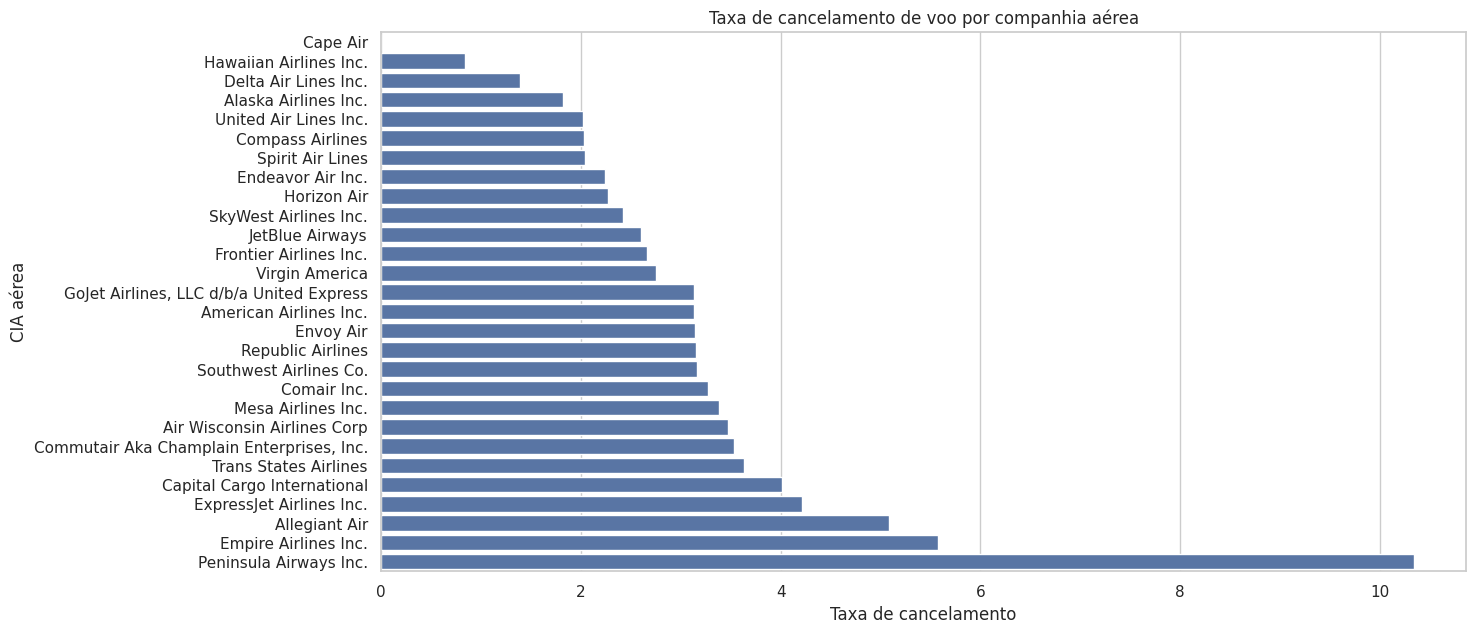

In [ ]:
# Cria uma figura para o gráfico
plt.figure(figsize=(14, 7))

# Plota o gráfico
sns.barplot(data=desempenho_companhia.sort_values('CancellationRate'), x='CancellationRate', y='Airline')

# Define os rótulos dos eixos e o título do gráfico
plt.title('Taxa de cancelamento de voo por companhia aérea')
plt.xlabel('Taxa de cancelamento')
plt.ylabel('CIA aérea')

# Exibe o gráfico
plt.show()

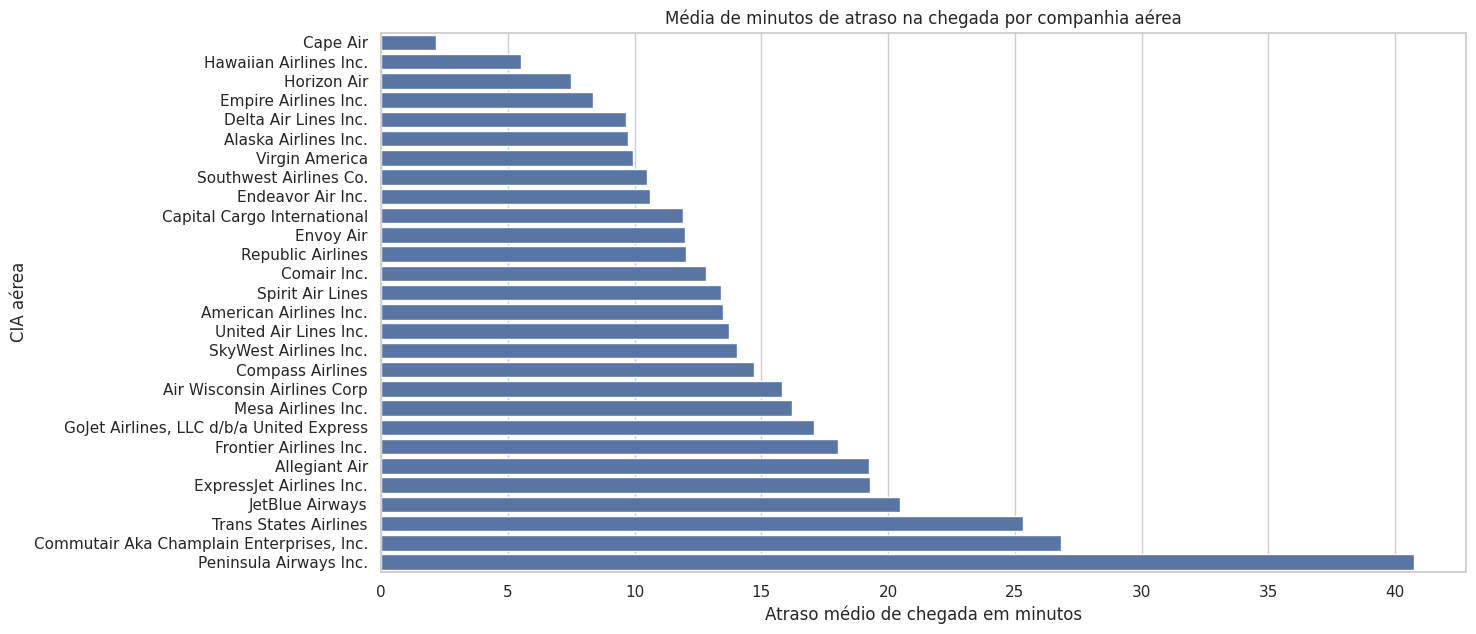

In [ ]:
# Cria uma figura para o gráfico
plt.figure(figsize=(14, 7))

# Plota o gráfico
sns.barplot(data=desempenho_companhia.sort_values('AvgArrDelayMinutes'), x='AvgArrDelayMinutes', y='Airline')

# Define os rótulos dos eixos e o título do gráfico
plt.title('Média de minutos de atraso na chegada por companhia aérea')
plt.xlabel('Atraso médio de chegada em minutos')
plt.ylabel('CIA aérea')

# Exibe o gráfico
plt.show()

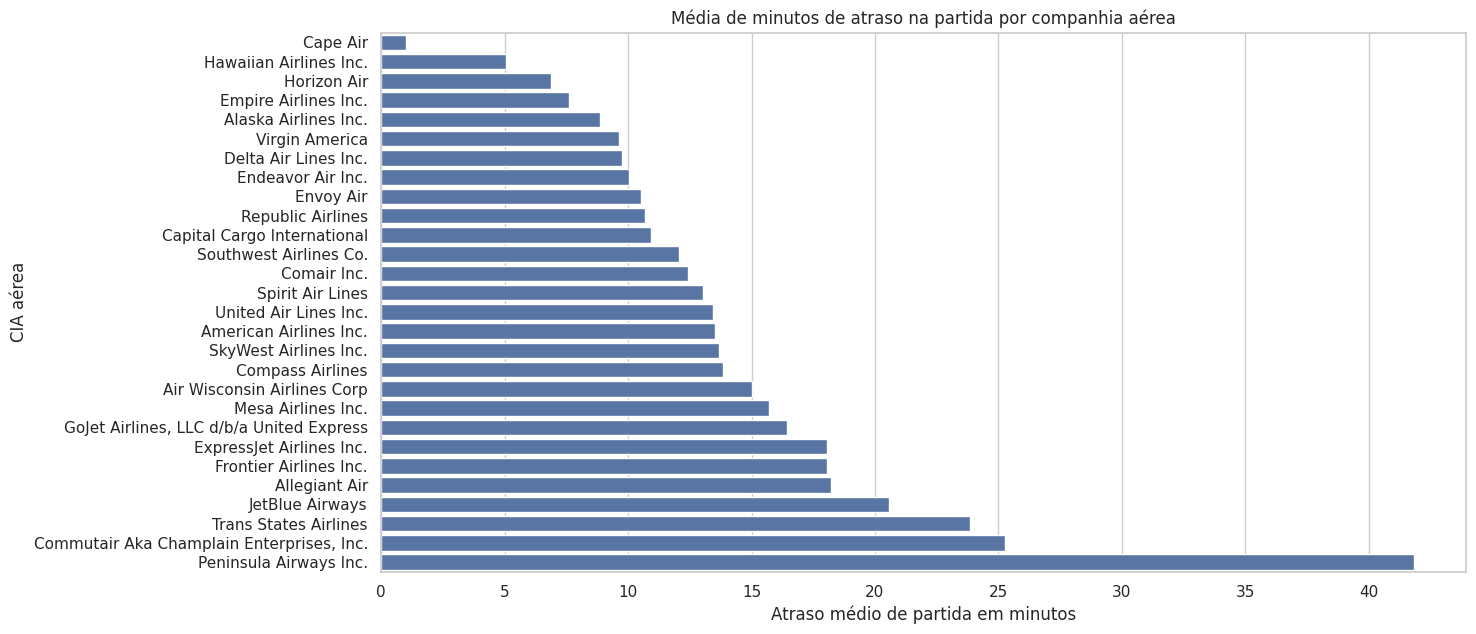

In [ ]:
# Cria uma figura para o gráfico
plt.figure(figsize=(14, 7))

# Plota o gráfico
sns.barplot(data=desempenho_companhia.sort_values('AvgDepDelayMinutes'), x='AvgDepDelayMinutes', y='Airline')

# Define os rótulos dos eixos e o título do gráfico
plt.title('Média de minutos de atraso na partida por companhia aérea')
plt.xlabel('Atraso médio de partida em minutos')
plt.ylabel('CIA aérea')

# Exibe o gráfico
plt.show()

### <font color='blue'>**Interpretação**</font>

**A análise dos dados revela que:**

- A companhia aérea com a maior taxa de cancelamento e tempo médio de atraso é a **Peninsula Airways Inc.**. Essa CIA aérea tem sede no Alasca, uma região com clima severo e imprevisível que pode afetar significativamente a pontualidade e aumentar o número de cancelamentos.

## **II. Análise da eficiência das rotas.**

### **1. Quais as principais rotas de voos?**

In [ ]:
# Agrupa os dados e contar as ocorrências de cada rota por ano
rotas_contagem = dados_anuais.groupby(['Year', 'Origin', 'Dest']).size().reset_index(name='counts')

# Seleciona as 10 rotas mais frequentes em termos absolutos
top_rotas = rotas_contagem.groupby(['Origin', 'Dest'])['counts'].sum().nlargest(10).reset_index()
print("As 10 Principais Rotas Mais Frequentes:")
print(top_rotas)

As 10 Principais Rotas Mais Frequentes:
  Origin Dest  counts
0    LAX  SFO     530
1    SFO  LAX     522
2    ORD  LGA     451
3    LAS  LAX     450
4    LAX  LAS     450
5    LGA  ORD     416
6    LAX  JFK     410
7    HNL  OGG     405
8    SEA  PDX     384
9    JFK  LAX     383


In [ ]:
# Filtra os dados originais para conter apenas essas top rotas
rotas_contagem = rotas_contagem.merge(top_rotas[['Origin', 'Dest']], on=['Origin', 'Dest'])

# Adiciona uma coluna com as rotas combinadas para facilitar a plotagem
rotas_contagem['Rota'] = rotas_contagem['Origin'] + ' to ' + rotas_contagem['Dest']

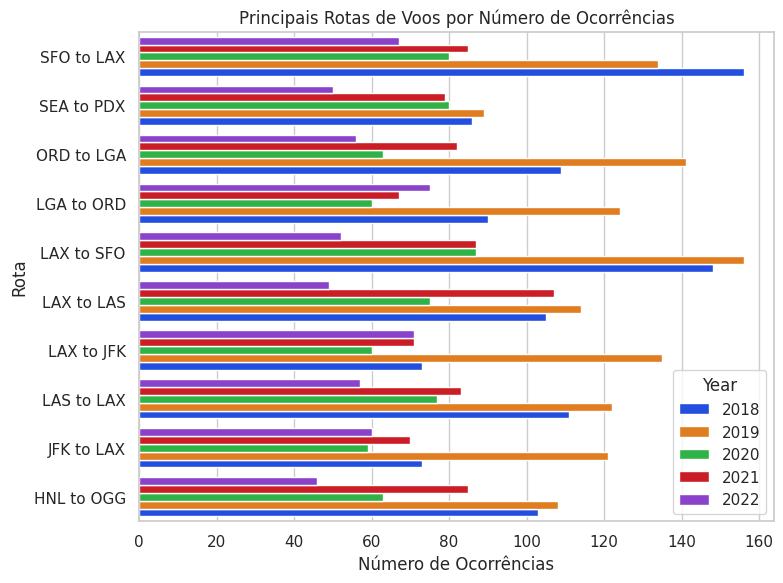

In [ ]:
# Cria uma figura para o gráfico
plt.figure(figsize=(8, 6))

# Plota o gráfico
sns.barplot(y='Rota', x='counts', hue='Year', data=rotas_contagem, palette='bright')

# Define os rótulos dos eixos e o título do gráfico
plt.xlabel('Número de Ocorrências')
plt.ylabel('Rota')
plt.title('Principais Rotas de Voos por Número de Ocorrências')

# Inverte a ordem das companhias aéreas no eixo Y para que a companhia com mais voos alterados apareça no topo
plt.gca().invert_yaxis()

# Ajusta o layout do gráfico para garantir que todos os elementos estejam bem posicionados e visíveis
plt.tight_layout()

# Exibe o gráfico
plt.show()

### <font color='blue'>**Interpretação**</font>

**O gráfico acima apresenta as principais rotas de voos nos EUA de 2018 a 2022 e mostra que:**

*   Algumas rotas, como "SFO to LAX", "LGA to ORD", e "LAS to LAX", aparecem consistentemente como populares ao longo dos anos, indicando que essas são rotas principais e frequentemente usadas.

*   A rota "SFO to LAX" teve um pico de ocorrências em 2020.

*   A rota "LAX to JFK" teve uma queda acentuada em 2020, provavelmente devido à pandemia de COVID-19 que afetou drasticamente as viagens de longa distância.

*   2020 mostra uma queda geral nas viagens aéreas, o que reflete o impacto da pandemia nas viagens aéreas. Com uma recuperação parcial em 2021 e 2022 pode ser observada em algumas rotas, embora não necessariamente para os níveis pré-pandêmicos.






 ### **2. Quais as rotas em que temos maior tempo de atraso?**

In [ ]:
# Calcula tempo de atraso total
dados_anuais['TotalDelayMinutes'] = dados_anuais['DepDelayMinutes'] + dados_anuais['ArrDelayMinutes']

In [ ]:
atraso_rotas_media = dados_anuais.groupby(['Origin', 'Dest']).agg({'TotalDelayMinutes': 'mean'}).reset_index()
atraso_rotas_media_sorted = atraso_rotas_media.sort_values(by='TotalDelayMinutes', ascending=False)
print(atraso_rotas_media_sorted.head(10))

# Calcula a média de minutos de atraso para cada rota (origem-destino) agrupando os dados por origem e destino
atraso_rotas_media = dados_anuais.groupby(['Origin', 'Dest']).agg({'TotalDelayMinutes': 'mean'}).reset_index()

# Ordena as rotas pelo número médio de minutos de atraso em ordem decrescente
atraso_rotas_media_sorted = atraso_rotas_media.sort_values(by='TotalDelayMinutes', ascending=False)

# Exibe as 10 rotas com o maior atraso médio
print(atraso_rotas_media_sorted.head(10))

     Origin Dest  TotalDelayMinutes
5805    RKS  RIW        1424.000000
1377    CRW  IAH         967.000000
4545    MSY  GRR         949.000000
6416    SGU  AZA         930.000000
2307    EWR  FWA         771.500000
2893    HTS  MYR         667.000000
5054    PAH  CGI         577.250000
417     AVL  BOS         528.500000
2724    HDN  ORD         498.200000
2537    FNT  MSP         497.333333


In [ ]:
# Calcula o total acumulado de minutos de atraso para cada rota (origem-destino) agrupando os dados por origem e destino
atraso_rotas_sum = dados_anuais.groupby(['Origin', 'Dest']).agg({'TotalDelayMinutes': 'sum'}).reset_index()

# Ordena as rotas pelo total de minutos de atraso em ordem decrescente
atraso_rotas_sum_sorted = atraso_rotas_sum.sort_values(by='TotalDelayMinutes', ascending=False)

# Exibe as 10 rotas com o maior total de atraso acumulado
print(atraso_rotas_sum_sorted.head(10))

     Origin Dest  TotalDelayMinutes
4915    ORD  LGA            13542.0
3959    MCO  EWR            13161.0
3604    LAX  JFK            12846.0
1550    DCA  BOS            12020.0
1687    DEN  DFW            11798.0
3492    LAS  LAX            11557.0
3653    LAX  SFO            11000.0
3542    LAS  SFO            10876.0
6355    SFO  LAX            10663.0
2325    EWR  MCO            10548.0


### **3. Quais as rotas em que temos maior índice de cancelamento de voos?**

In [ ]:
# Calcula o número total de voos cancelados e o número total de voos para cada rota (origem-destino)
cancelamento_rota = dados_anuais.groupby(['Origin', 'Dest']).agg(
    CancelledFlights=('Cancelled', 'sum'),
    TotalFlights=('Cancelled', 'count')
).reset_index()

# Calcula a taxa de cancelamento para cada rota (percentual de voos cancelados em relação ao total de voos)
cancelamento_rota['CancellationRate'] = cancelamento_rota['CancelledFlights'] / cancelamento_rota['TotalFlights']

# Ordena as rotas pela taxa de cancelamento em ordem decrescente
cancelamento_rota_sorted = cancelamento_rota.sort_values(by='CancellationRate', ascending=False)

# Exibe as 10 rotas com a maior taxa de cancelamento
print(cancelamento_rota_sorted.head(10))

     Origin Dest  CancelledFlights  TotalFlights  CancellationRate
1069    CHS  SDF                 1             1               1.0
6407    SGF  HOU                 1             1               1.0
4703    OGG  MKK                 1             1               1.0
1331    CMH  PNS                 1             1               1.0
2182    DTW  TTN                 1             1               1.0
5193    PGD  ORF                 1             1               1.0
5084    PBI  MEM                 1             1               1.0
3707    LEX  MYR                 1             1               1.0
4598    MYR  CAK                 1             1               1.0
2602    GFK  SFB                 1             1               1.0


In [ ]:
# Exibe o número total de voos no DataFrame 'dados_anuais' que têm a coluna 'Cancelled' não nula
print(dados_anuais["Cancelled"].count())

292111


### **4. Quais são as rotas mais eficientes e as menos eficientes?**



In [ ]:
df_rotas = dados_anuais

# Cria uma coluna 'Rota' que une Origem e Destino
df_rotas['Rota'] = df_rotas['Origin'] + '-' + df_rotas['Dest']

# Calcula e normaliza as métricas de eficiência
df_rotas['Normalized_DepDelay'] = df_rotas['DepDelay'] / df_rotas['DepDelay'].max()
df_rotas['Normalized_ArrDelay'] = df_rotas['ArrDelay'] / df_rotas['ArrDelay'].max()
df_rotas['Normalized_Distance'] = df_rotas['Distance'] / df_rotas['Distance'].max()

# Calcula a eficiência como uma combinação das métricas normalizadas
df_rotas['Eficiência'] = (df_rotas['Normalized_Distance'] - df_rotas['Normalized_DepDelay'] - df_rotas['Normalized_ArrDelay'])

# Agrupa por 'Rota' e calcular a eficiência média
rotas_eficientes = df_rotas.groupby('Rota')['Eficiência'].mean().reset_index()

# Ordena por eficiência
mais_eficiente = rotas_eficientes.sort_values(by='Eficiência', ascending=False)
menos_eficiente = rotas_eficientes.sort_values(by='Eficiência', ascending=True)

mais_eficiente = mais_eficiente.head()
menos_eficiente = menos_eficiente.head()

print("As 5 rotas mais eficientes:")
print(mais_eficiente)

print("\nAs 5 rotas menos eficientes:")
print(menos_eficiente)

As 5 rotas mais eficientes:
         Rota  Eficiência
2750  HNL-BOS    1.002956
757   BOS-HNL    0.993047
2754  HNL-EWR    0.983970
3342  JFK-HNL    0.981815
4695  OGG-EWR    0.969822

As 5 rotas menos eficientes:
         Rota  Eficiência
5805  RKS-RIW   -0.590367
6416  SGU-AZA   -0.344586
5054  PAH-CGI   -0.231827
4545  MSY-GRR   -0.225330
1377  CRW-IAH   -0.223674


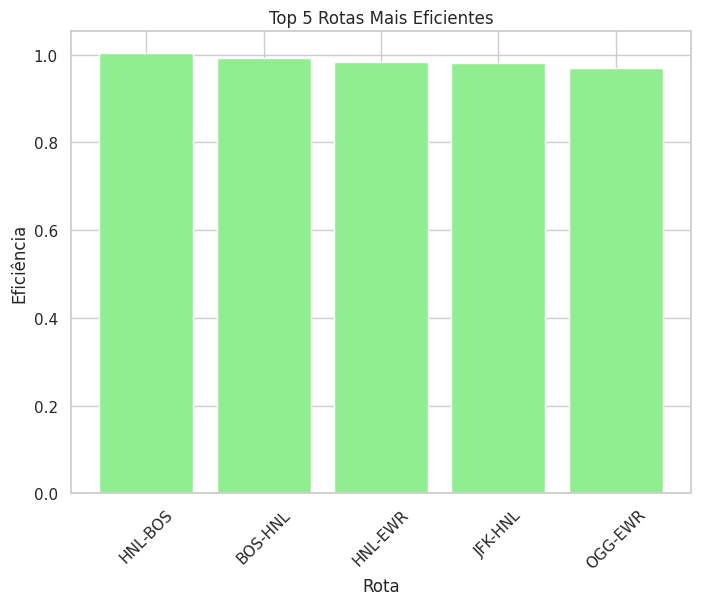

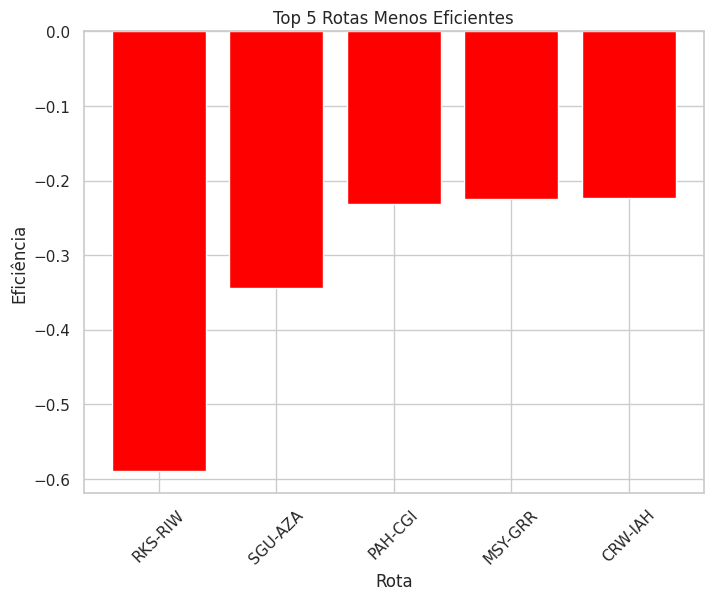

In [ ]:
# Cria uma figura para o gráfico
plt.figure(figsize=(8, 6))

# Plota gráfico das rotas mais eficientes
plt.bar(mais_eficiente['Rota'], mais_eficiente['Eficiência'], color='lightgreen')

# Define os rótulos dos eixos e o título do gráfico
plt.xlabel('Rota')
plt.ylabel('Eficiência')
plt.title('Top 5 Rotas Mais Eficientes')

# Rotaciona os rótulos do eixo X em 45 graus para melhorar a legibilidade
plt.xticks(rotation=45)

# Exibe o gráfico
plt.show()
print('\n')

# Cria uma figura para o gráfico
plt.figure(figsize=(8, 6))

# Plota gráfico das rotas menos eficientes
plt.bar(menos_eficiente['Rota'], menos_eficiente['Eficiência'], color='red')

# Define os rótulos dos eixos e o título do gráfico
plt.xlabel('Rota')
plt.ylabel('Eficiência')
plt.title('Top 5 Rotas Menos Eficientes')

# Rotaciona os rótulos do eixo X em 45 graus para melhorar a legibilidade
plt.xticks(rotation=45)
# Exibe o gráfico
plt.show()

## **III. Análise do atraso das rotas**

### **1- Qual o tempo médio de atraso dos voos? Considere as colunas `ArrDelayMinutes` e `DepDelayMinutes`.**

In [ ]:
# Calcula o tempo médio de atraso considerando as colunas`ArrDelayMinutes` e `DepDelayMinutes`.
mean_dep_delay = dados_anuais['DepDelayMinutes'].mean()
mean_arr_delay = dados_anuais['ArrDelayMinutes'].mean()

mean_dep_delay, mean_arr_delay

(12.796374363175456, 12.849552030407633)

### **2- Quais os fatores mais correlacionados com o atraso de um voo?**

In [ ]:
# Seleciona colunas numéricas para análise de correlação
numeric_columns = dados_anuais.select_dtypes(include='number').columns

# Calcula a correlação
correlation_matrix = dados_anuais[numeric_columns].corr()

# Seleciona correlações com atrasos
correlation_with_delay = correlation_matrix[['DepDelayMinutes', 'ArrDelayMinutes']]

# Ordena as correlações
correlation_with_delay_sorted = correlation_with_delay.sort_values(by=['DepDelayMinutes', 'ArrDelayMinutes'], ascending=False)

# Exibe as 10 primeiras linhas do DataFrame 'correlation_with_delay_sorted' para visualizar as correlações mais altas
correlation_with_delay_sorted.head(10)

,DepDelayMinutes,ArrDelayMinutes
DepDelayMinutes,1.000000,0.979006
DepDelay,0.996965,0.974778
Normalized_DepDelay,0.996965,0.974778
TotalDelayMinutes,0.994760,0.994715
ArrDelayMinutes,0.979006,1.000000
ArrDelay,0.959577,0.981550
Normalized_ArrDelay,0.959577,0.981550
DepartureDelayGroups,0.829128,0.797144
ArrivalDelayGroups,0.777692,0.807258
DepDel15,0.556098,0.512490


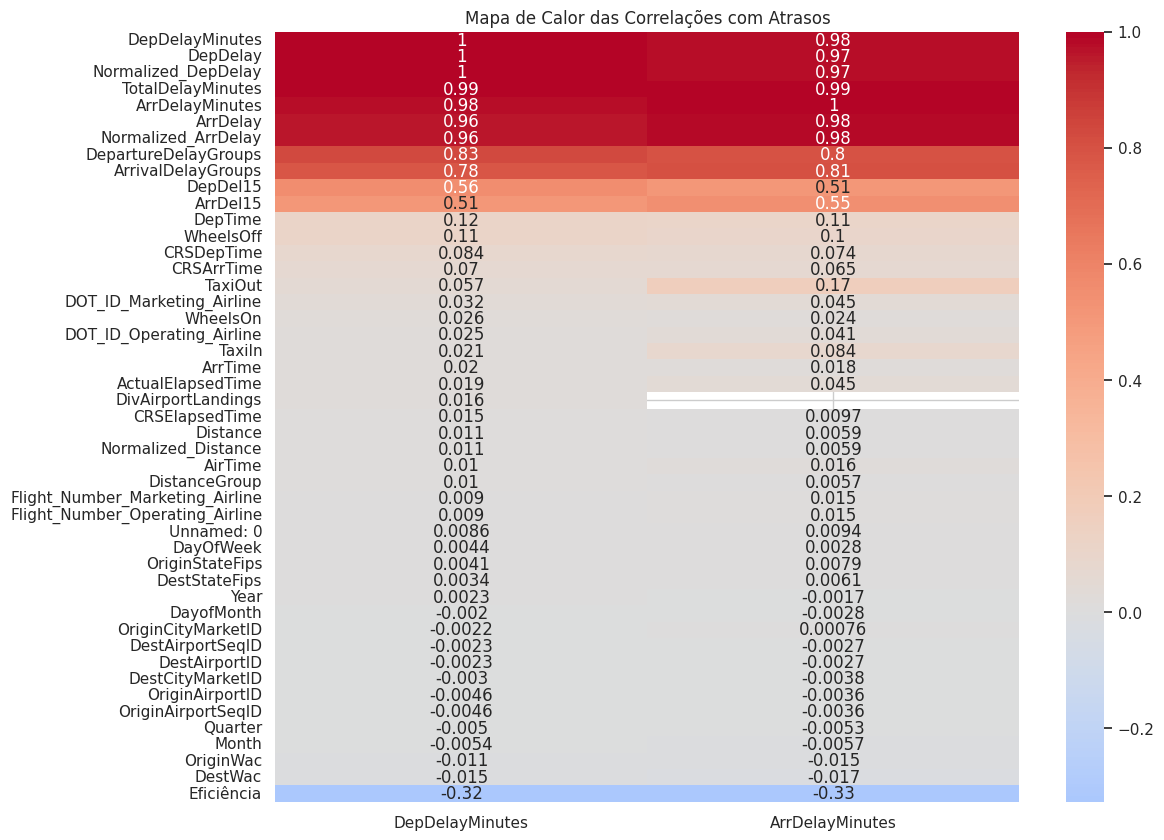

In [ ]:
# Cria uma figura para o heatmap
plt.figure(figsize=(12, 10))

# Plota o heatmap para visualizar a correlação entre fatores, com anotações e uma paleta de cores
sns.heatmap(correlation_with_delay_sorted, annot=True, cmap='coolwarm', center=0)

# Adiciona um título ao heatmap
plt.title('Mapa de Calor das Correlações com Atrasos')

# Exibe o heatmap
plt.show()

### <font color='blue'>**Interpretação**</font>

>Os fatores que mais se correlacionam com o atraso na partida e na chegada são essencialmente as mesmas variáveis de atraso, como esperado. Além disso, os grupos de atraso (`DepartureDelayGroups` e `ArrivalDelayGroups`) e os indicadores de atraso (`DepDel15` e `ArrDel15`) também têm correlações notáveis.
Vendo o mapa de calor das correlações, as Cores mais próximas do vermelho indicam uma forte correlação positiva e Cores mais próximas do azul indicam uma forte correlação negativa.


## **Modelagem:**

>**IV**- Construa um modelo de regressão linear em que queremos estimar o tempo de atraso de um voo, considere o atraso da partida variável `DepDelayMinutes`.

<font color='red'>*Lembre-se de construir variáveis dummy a partir de categorias como: mês do ano e rotas específicas.*</font>  

In [ ]:
# Colunas relevantes
df_regressao = dados_anuais[['DepDelayMinutes', 'ArrDelayMinutes', 'DepDelay', 'ArrDelay',
    'DepartureDelayGroups', 'ArrivalDelayGroups', 'DepDel15', 'ArrDel15',
    'DepTime', 'WheelsOff', 'FlightDate', 'Origin', 'Dest']]

# Extrai o mês a partir da coluna FlightDate
df_regressao['FlightDate'] = pd.to_datetime(df_regressao['FlightDate'])
df_regressao['Month'] = df_regressao['FlightDate'].dt.month

# Cria variáveis dummy para o mês e rotas
df_dummies = pd.get_dummies(df_regressao, columns=['Month', 'Origin', 'Dest'], drop_first=True)

# Excluí valores ausentes
df_dummies = df_dummies.dropna()

# Define variáveis independentes (X) e dependentes (y)
X = df_dummies.drop(columns=['DepDelayMinutes', 'FlightDate'])
y = df_dummies['DepDelayMinutes']

# Escalonamento das variáveis numéricas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divide os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modelo de Regressão Ridge com regularização
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.1)  # Ajusta o valor de alpha
model.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avalia o modelo com sklearn.metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 7.290824358323663
R-squared: 0.9965753098702764


## **Verificação de Suposições do Modelo de Regressão Linear**

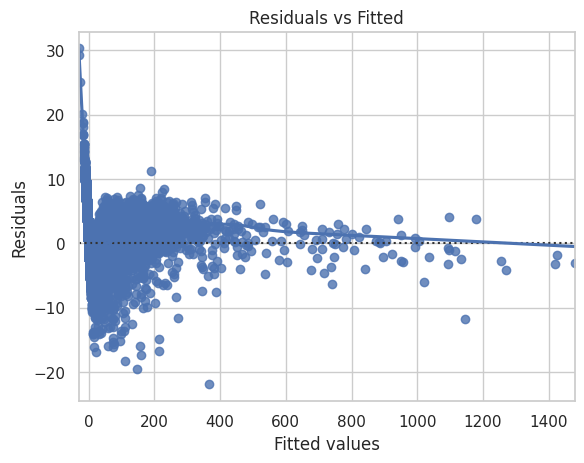

In [ ]:
# 1. Residuals vs Fitted Plot

# Calcula os resíduos subtraindo os valores preditos (y_pred) dos valores reais (y_test)
residuals = y_test - y_pred

# Plota o gráfico de resíduos vs valores ajustados com uma linha de suavização (lowess)
sns.residplot(x=y_pred, y=residuals, lowess=True)

# Adiciona um título ao gráfico
plt.title('Residuals vs Fitted')

# Adiciona um rótulo ao eixo X para valores ajustados
plt.xlabel('Fitted values')

# Adiciona um rótulo ao eixo Y para resíduos
plt.ylabel('Residuals')

# Exibe o gráfico
plt.show()

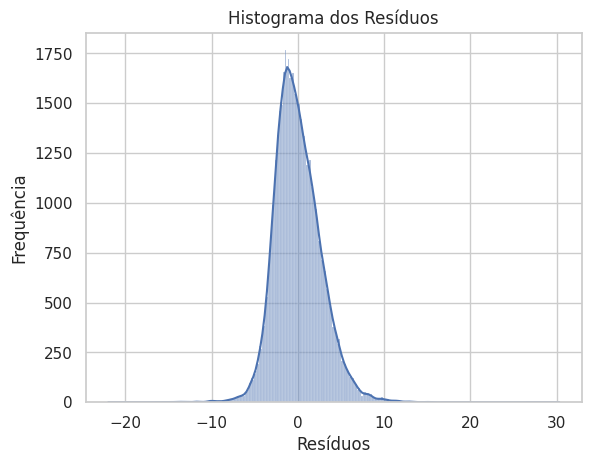

In [ ]:
# 2. Normalidade dos Resíduos
sns.histplot(residuals, kde=True)

# Adiciona um título ao gráfico
plt.title('Histograma dos Resíduos')

# Adiciona um rótulo ao eixo X
plt.xlabel('Resíduos')

# Adiciona um rótulo ao eixo Y
plt.ylabel('Frequência')

# Exibe o gráfico
plt.show()

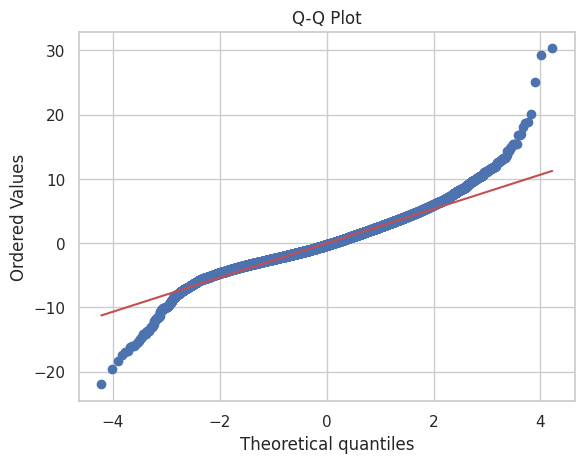

In [ ]:
# 3. Plot de Q-Q
stats.probplot(residuals, dist="norm", plot=plt)

# Adiciona um título ao gráfico
plt.title('Q-Q Plot')

# Exibe o gráfico
plt.show()